In [2]:
#DAY-1 (09/10/2024)
!python --version


Python 3.12.0


In [3]:
pip install torch


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import torch
import torchvision

In [6]:
import torch
print(torch.__version__)


2.4.1+cpu


In [7]:
import torchvision
print(torchvision.__version__)


0.19.1+cpu


In [8]:
train_data_set=torchvision.datasets.MNIST(root='./data', train=True, download=True )


In [9]:
print(train_data_set)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train


In [10]:
#DAY-2(10/10/2024)

In [11]:

load_data=torch.utils.data.DataLoader(dataset=train_data_set, batch_size=64, shuffle=True)


In [12]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
len(load_data)

938

In [14]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [52]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),          
    transforms.RandomHorizontalFlip(),    
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  
    transforms.ToTensor(),                
    transforms.Normalize((0.5,), (0.5,))  
])
train_data_set=datasets.MNIST(root='./data', train=True, download=True, transform=transform)

In [53]:
mnist_loader = DataLoader(dataset=train_data_set, batch_size=64, shuffle=True)

In [54]:
data_iter = iter(mnist_loader)
images, labels = next(data_iter)


In [55]:
def show_img(images,labels):
    fig,axes=plt.subplots(4,5,figsize=(12,12))
    for i, axi in enumerate(axes.flatten()):
        axi.imshow(images[i].squeeze(), cmap='gray')
        axi.set_title("Label: "+str(labels[i].item()))
    plt.show()


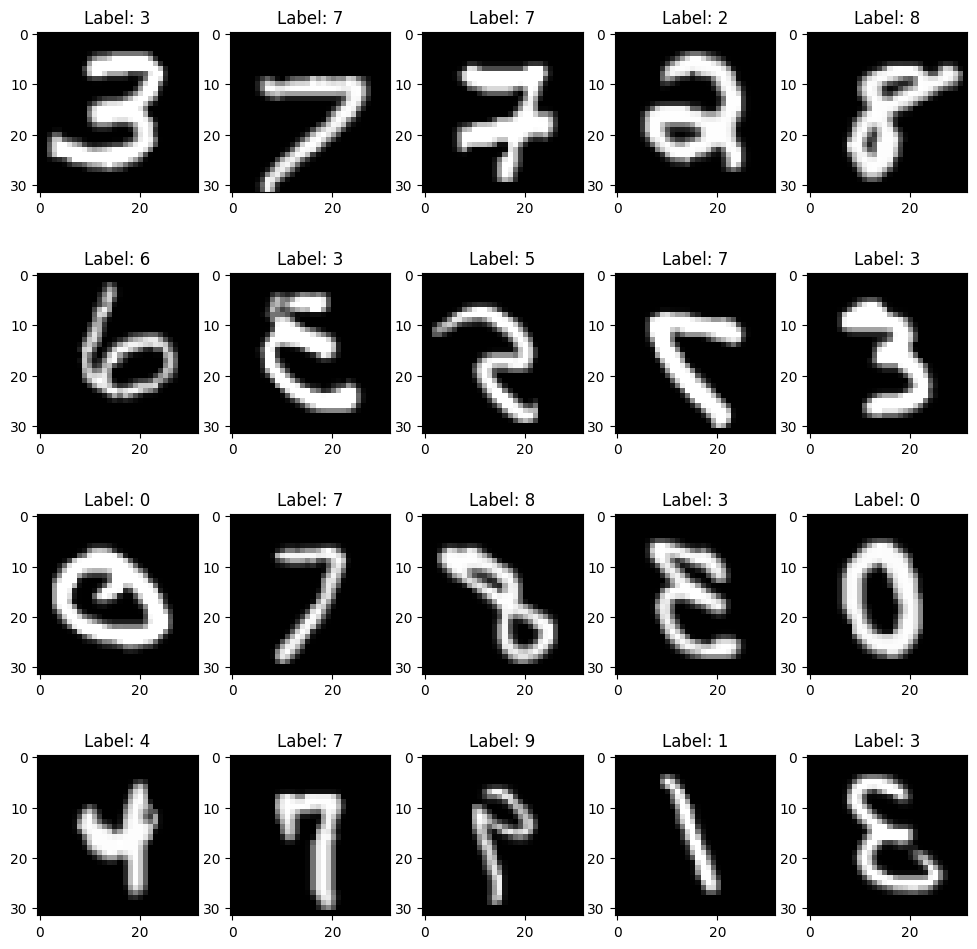

In [56]:
show_img(images,labels)